## Portfolio Optimization

Portfolio optimization models are concerned with investment where there are typically two criteria: expected return and risk. The investor wants the former to be high and the latter to be low. There is a variety of measures
of risk. The most popular measure of risk has been variance in return. Even though there are some problems with it, we will first look at it very closely.

### The Markowitz Mean/Variance Portfolio Model
The portfolio model, introduced by Markowitz, assumes an investor has two considerations when constructing an investment portfolio: expected return and variance in return (i.e., risk). Variance measures the variability in realized return around the expected return. The Markowitz model requires two major kinds of information: 

* the estimated expected return for each candidate investment;
* the covariance matrix of returns. 

The covariance matrix characterizes not only the individual variability of the return on each investment, but also how each investment’s return tends to move with other investments. 

Part of the appeal of the Markowitz model is it can be solved by efficient quadratic programming methods. Quadratic programming is the name applied to the class of models in which the objective function is a quadratic function and the constraints are linear. Thus, the objective function is allowed to have terms that are products of two variables such as $x^2$ and $x\cdot y$.

### Example
In the following example data from Quandl will be used. The following table shows part of the sample which include for each entry a date and the corresponding closing price of five company stocks:

In [24]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, scipy.optimize as sco

temp = pd.read_csv("quandl.csv")
clean = temp.set_index('date')
df = clean.pivot(columns='ticker')

print (df.head())

            adj_close                                         
ticker            CNP          F         GE    TSLA        WMT
date                                                          
2014-01-02  19.116238  12.726742  24.266002  150.10  71.343743
2014-01-03  19.107861  12.784441  24.248354  149.56  71.108673
2014-01-06  19.132992  12.842140  24.054226  147.00  70.710863
2014-01-07  19.334039  12.677286  24.080698  149.36  70.927850
2014-01-08  19.132992  12.809169  24.010106  151.28  70.367299


With \texttt{pandas} the main characteristics of these time series can be easily computed (e.g. daily returns, covariance matrix):

In [29]:
# daily returns
daily_returns = df.pct_change()
print (daily_returns.head())

# covariance
covariance = daily_returns.cov()
print (covariance)

           adj_close                                        
ticker           CNP         F        GE      TSLA       WMT
date                                                        
2014-01-02       NaN       NaN       NaN       NaN       NaN
2014-01-03 -0.000438  0.004534 -0.000727 -0.003598 -0.003295
2014-01-06  0.001315  0.004513 -0.008006 -0.017117 -0.005594
2014-01-07  0.010508 -0.012837  0.001101  0.016054  0.003069
2014-01-08 -0.010399  0.010403 -0.002931  0.012855 -0.007903
                 adj_close                                        
ticker                 CNP         F        GE      TSLA       WMT
          ticker                                                  
adj_close CNP     0.000140  0.000043  0.000046  0.000059  0.000034
          F       0.000043  0.000200  0.000083  0.000095  0.000039
          GE      0.000046  0.000083  0.000161  0.000073  0.000035
          TSLA    0.000059  0.000095  0.000073  0.000656  0.000049
          WMT     0.000034  0.000039  0.000

The correlation matrix makes it more obvious how two random variables move together. The correlation between two random variables equals the covariance between the two variables, divided by the product of the standard deviations of the two random variables. 
The correlation can be between -1 and +1 with +1 (-1) being perfect correlation (anticorrelation) between the two.
In our sample correlations are quite small but all the stocks are positively correlated.

### Optimization

Let $w_i$ represent the fraction of the portfolio devoted to each stock, Markowitz model states that the weights $w_i$ should be choosen such that the portfolio volatility (variance) is minimized. So the application of Markovitz model reduces to an optimization problem, given $V$ the covariance matrix of the portfolio estimated before from the historical series:

$$ V = \sum_{i}\sum_{j} (w_i w_j V_{ij})^{2} $$

with the constraint $\sum_{i}w_i = 1$ and $0 \le w_i \le 1$.




and suppose, we desire a 15\% yearly return. The entire model can be written as:

$$ 
MODEL:
!Minimize end-of-period variance in portfolio value;
[VAR] MIN = .01080754 * ATT * ATT +.01240721 * ATT * GMC +
.01307513 * ATT * USX +.01240721 * GMC * ATT +.05839170 * GMC *
GMC +.05542639 * GMC * USX +.01307513 * USX * ATT +.05542639 * USX
* GMC +.09422681 * USX * USX;
! Use exactly 100% of the starting budget;
[BUD] ATT + GMC + USX = 1;
! Required wealth at end of period;
[RET] 1.089083 * ATT + 1.213667 * GMC + 1.234583 * USX >= 1.15;
END

This can be translated into \texttt{python} 
When we solve the model, we get:
Optimal solution found at step: 4
Objective value: 0.2241375E-01
Variable Value Reduced Cost
TARGET 1.150000 0.0000000
AMT( ATT) 0.5300926 0.0000000
AMT( GMC) 0.3564106 0.0000000
AMT( USX) 0.1134968 0.0000000
RET( ATT) 1.089083 0.0000000
RET( GMC) 1.213667 0.0000000
RET( USX) 1.234583 0.0000000
Row Slack or Surplus Dual Price
VAR 0.2241375E-01 1.000000
BUDGET 0.0000000 0.3621387
RETURN 0.0000000 -0.3538836

The solution recommends about 53% of the portfolio be put in ATT, about 36% in GMC and just
over 11% in USX. The expected return is 15%, with a variance of 0.02241381 or, equivalently, a
standard deviation of about 0.1497123.
We based the model simply on straightforward statistical data based on daily returns. 
Also, rather than use historical data for estimating the expected return of an asset, a decision maker
might base the expected return estimate on more current, proprietary information about expected future
performance of the asset. 

### Efficient Frontier and Parametric Analysis
There is no precise way for an investor to determine the “correct” tradeoff between risk and return.
Thus, one is frequently interested in looking at the tradeoff between the two. If an investor wants a
higher expected return, she generally has to “pay for it” with higher risk. In finance terminology, we
would like to trace out the efficient frontier of return and risk. If we solve for the minimum variance
portfolio over a range of values for the expected return, ranging from 0.02 to 0.15, we get
the following plot or tradeoff curve for our example.

Notice the “knee” in the curve as the required expected return increases past 1.21894. This is the
point where ATT drops out of the portfolio.

### Portfolios with a Risk-Free Asset
When one of the investments available is risk free, then the optimal portfolio composition has a
particularly simple form. Suppose the opportunity to invest money risk free (e.g., in government
treasury bills) at 5\% per year has just become available. Working with our previous example, we now
have an additional investment instrument that has zero variance and zero covariance. There is no limit on
how much can be invested at 5\%. We ask the question: how does the portfolio composition change as
the desired rate of return changes from 15\% to 5\%?

When solved, we find:
Optimal solution found at step: 8
Objective value: 0.2080344E-01
Variable Value Reduced Cost
ATT 0.8686550E-01 -0.2093725E-07
GMC 0.4285285 0.0000000
USX 0.1433992 -0.2218303E-07
TBILL 0.3412068 0.0000000
Row Slack or Surplus Dual Price
VAR 0.2080344E-01 1.000000
BUD 0.0000000 0.4368723
RET 0.0000000 -0.4160689
Notice more than 34% of the portfolio was invested in the risk-free investment, even though its
return rate, 5%, is less than the target of 15%. Further, the variance has dropped to about 0.0208 from
about 0.0224.
What happens as we decrease the target return towards 5%? Clearly, at 5%, we would put zero in
ATT, GMC, and USX. A simple form of solution would be to keep the same proportions in ATT, GMC,
and USX, but just change the allocation between the risk-free asset and the risky ones. Let us check an
intermediate point. When we decrease the required return to 10%, we get the following solution:
Optimal solution found at step: 8
Objective value: 0.5200865E-02
Variable Value Reduced Cost
ATT 0.4342898E-01 0.0000000
GMC 0.2142677 0.2857124E-06
USX 0.7169748E-01 0.1232479E-06
TBILL 0.6706058 0.0000000
Row Slack or Surplus Dual Price
VAR 0.5200865E-02 1.000000
BUD 0.0000000 0.2184348
RET 0.2384186E-07 -0.2080331
This solution supports our conjecture:
as we change our required return, the relative proportions devoted to risky
investments do not change. Only the allocation between the risk-free asset and the
risky assets change.

From the above solution, we observe that, except for round-off error, the amount invested in risky stocks is allocated in the same way for both solutions. Thus, two investors with different risk preferences would nevertheless both carry the same mix of risky stocks in their portfolio. Their portfolios would differ only in the proportion devoted to the risk-free asset. Our observation from the above example in fact holds in general. Thus, the decision of how to allocate funds among stocks, given the amount to be invested, can be separated from the questions of risk preference (this feature is called Separation Theorem).

### The Sharpe Ratio
For some portfolio $p$, of risky assets, excluding the risk-free asset, let:

* $R_p$ its expected return;
* $s_p$ its standard deviation in return;
* $r_0$ the return of the risk-free asset.

A plausible single measure (as opposed to the two measures, risk and return) of attractiveness of
portfolio $p$ is the Sharpe ratio:

$$ (R_p - r_0 ) / s_p $$

In words, it measures how much additional return we achieved for the additional risk we took on,
relative to putting all our money in the risk-free asset.
It happens the portfolio that maximizes this ratio has a certain well-defined appeal. Suppose:

* $t$ our desired target return;
* $w_p$ the fraction of our wealth we place in portfolio $p$ (the rest placed in the risk-free asset).

To meet our return target, we must have:

$$ ( 1 - w_p ) * r_0 + w_p * R_p = t $$

The standard deviation of our total investment is: $w_p\cdot s_p$.
Solving for $w_p$ in the return constraint, we get:

$$ w_p = \cfrac{( t – r_0)}{( R_p – r_0)} $$

Thus, the standard deviation of the portfolio is:

$$ w_p\cdot s_p = \Big[\cfrac{( t – r_0)}{(R_p – r_0)}\Big]\cdot s_p $$

Minimizing the portfolio standard deviation means:

$$ \textrm{min}(\Big[\cfrac{( t – r_0)}{(R_p – r_0)}\Big]\cdot s_p)\implies\textrm{max}(\cfrac{R_p – r_0}{s_p}) $$

So, regardless of our risk/return preference, the money we invest in risky assets should be invested
in the risky portfolio that maximizes the Sharpe ratio.

The following illustrates for when the risk free rate is 5%:
MODEL:
! Maximize the Sharpe ratio;
MAX =
(1.089083*ATT + 1.213667*GMC + 1.234583*USX - 1.05)/
((.01080754 * ATT * ATT + .01240721 * ATT * GMC
+ .01307513 * ATT * USX + .01240721 * GMC * ATT
+ .05839170 * GMC * GMC + .05542639 * GMC * USX
+ .01307513 * USX * ATT + .05542639 * USX * GMC
+ .09422681 * USX * USX)^.5);
! Use exactly 100% of the starting budget;
[BUD] ATT + GMC + USX = 1;
END
The solution is:
Optimal solution found at step: 7
Objective value: 0.6933179
Variable Value Reduced Cost
ATT 0.1319260 0.1263448E-04
GMC 0.6503984 0.0000000
USX 0.2176757 0.1250699E-04
Notice the relative proportions of ATT, GMC, and USX are the same as in the previous model
where we explicitly included a risk free asset with a return of 5\%. For example, notice that, except for
round-off error:
.1319262/ .6503983 = 0.08686515/ .4285286.

### Criticisms to Markowitz Model

## Risk Parity Portfolio

A risk parity portfolio is an investment allocation strategy which focuses on the allocation of risk, rather than the allocation of capital. For example, a typical 40% bond 60% equity portfolio has a significant risk in equity. A risk parity (equal risk) portfolio is a portfolio, whose individual assets, in this case equity and bond, have equal risk contribution to the total portfolio risk. The allocation strategy has gained popularity in the last decades. It is believed that this allocation strategy provides better risk adjusted return than capital based allocation strategies.

Let's go over a very basic example of what risk parity is and how to construct a simple risk parity (equal risk) portfolio and extend it to a risk budgeting portfolio (target risk allocation).

First define the marginal risk contribution as:

$$ \textrm{MRC}_j = \cfrac{\partial{\sigma_p}}{\partial{w_j}} = \cfrac{(\mathbf{V}\cdot \mathbf{w})_j}{\sigma_p} $$

where $w_j$ is the weight of the j-th asset and $\sigma_p = \sqrt{\mathbf{w}\mathbf{V}\mathbf{w^{T}}} $.

Then, the risk contribution of asset $j$ to the total portfolio is:

$$ \textrm{RC}_j =  \mathbf{w}\cdot\textrm{MRC}_j = w_j \cfrac{(\mathbf{V}\cdot \mathbf{w})_j}{\sigma_p} $$

As said a risk parity portfolio is a portfolio which RC are equal across all individual assets.
For example, going back to the previous example and assuming we have an equal weight portfolio, it’s RC (in total portfolio risk \%) is:

To compute the weight of a risk parity portfolio, we could use again the optimise function from \texttt{python}, where our objective function is the sum of squared error of a portfolio assets RC:

$$ J = \sum_{i=1}^{n}\sum_{j=1}^{n}((w_i V_i w_i) - (w_j V_j w_j))^{2} $$

So we need to find $\textrm{min}(J)$ with the constraint $\sum_{i} w_i = 1$ and $0 \le w_i \le 1$.

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from numpy.linalg import inv,pinv
from scipy.optimize import minimize

 # risk budgeting optimization
def calculate_portfolio_var(w,V):
    # function that calculates portfolio risk
    w = np.matrix(w)
    return (w*V*w.T)[0,0]

def calculate_risk_contribution(w,V):
    # function that calculates asset contribution to total risk
    w = np.matrix(w)
    sigma = np.sqrt(calculate_portfolio_var(w,V))
    # Marginal Risk Contribution
    MRC = V*w.T
    # Risk Contribution
    RC = np.multiply(MRC,w.T)/sigma
    return RC

def risk_budget_objective(x,pars):
    # calculate portfolio risk
    V = pars[0]# covariance table
    x_t = pars[1] # risk target in percent of portfolio risk
    sig_p =  np.sqrt(calculate_portfolio_var(x,V)) # portfolio sigma
    risk_target = np.asmatrix(np.multiply(sig_p,x_t))
    asset_RC = calculate_risk_contribution(x,V)
    J = sum(np.square(asset_RC-risk_target.T))[0,0] # sum of squared error
    return J

def total_weight_constraint(x):
    return np.sum(x)-1.0

def long_only_constraint(x):
    return x

V = np.matrix('123 37.5 70 30; 37.5 122 72 13.5; 70 72 321 -32; 30 13.5 -32 52')/100

w0 = [0.3, 0.3, 0.3, 0.1]
x_t = [0.25, 0.25, 0.25, 0.25] # your risk budget percent of total portfolio risk (equal risk)
cons = ({'type': 'eq', 'fun': total_weight_constraint},
        {'type': 'ineq', 'fun': long_only_constraint})
res = minimize(risk_budget_objective, w0, args=[V,x_t], method='SLSQP',constraints=cons, options={'disp': True})
w_rb = np.asmatrix(res.x)

print (calculate_risk_contribution(res.x, V))



Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.437796531429956e-08
            Iterations: 7
            Function evaluations: 45
            Gradient evaluations: 7
[[0.16573021]
 [0.16586718]
 [0.16585805]
 [0.16575904]]


The very same functions can be used to calculate any risk budget allocation since it actually uses:

$$ J = \sum_{i=1}^{n}((w_i V_i w_i) - \mathbf{w_{target}}\cdot\sqrt{\mathbf{wVw^{T}}} $$

and it can be modified by setting up a target risk allocation for each asset then minimise the objective function of squared errors.

In [23]:
x_t = [0.3, 0.3, 0.3, 0.1] # your risk budget percent of total portfolio risk (equal risk)
res = minimize(risk_budget_objective, w0, args=[V,x_t], method='SLSQP',constraints=cons, options={'disp': True})
#w_rb = np.asmatrix(res.x)

var = sum(calculate_risk_contribution(res.x, V))
print (calculate_risk_contribution(res.x, V)/var)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.7020698516768012e-08
            Iterations: 9
            Function evaluations: 55
            Gradient evaluations: 9
[[0.30005466]
 [0.29988685]
 [0.30011042]
 [0.09994806]]


In [3]:
import pandas as pd
import numpy as np, matplotlib.pyplot as plt, scipy.optimize as optimize

temp = pd.read_csv("quandl.csv") 
clean = temp.set_index('date')
df = clean.pivot(columns='ticker')
daily_returns = df.pct_change()
annual_expected = daily_returns.mean() * 252
covariance = daily_returns.cov() 
annual_covariance = covariance * 252

def sumWeights(weights): 
    return np.sum(weights) - 1
def objective(weights, covariance):
    return np.sqrt(np.dot(weights.T, np.dot(covariance, weights)))
numAssets = 5
constraints = ({'type': 'eq', 'fun': sumWeights},) 
bounds = tuple((0, 1) for asset in range(numAssets))
opts = optimize.minimize(objective, np.ones(numAssets) / float(numAssets), 
                         args=(annual_covariance,),
                         bounds=bounds, constraints=constraints)
print (opts)

     fun: 0.18996519187658553
     jac: array([0.19007478, 0.19040664, 0.18950935, 0.1898793 , 0.18995349])
 message: 'Optimization terminated successfully.'
    nfev: 63
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([0.44735955, 0.06873074, 0.10429827, 0.36908076, 0.01053068])


In [7]:
def getTargetReturn(weights, returns, targetReturn): 
    portfolio_return = np.sum(returns*weights) 
    return (portfolio_return - targetReturn)
returns = []
for eff in np.arange(0.20, 0.45, 0.005):
    constraints = ({'type': 'eq', 'fun': getTargetReturn, 
                    'args':(annual_expected, eff,)},
                   {'type': 'eq', 'fun': sumWeights}) 
    bounds = tuple((0, 1) for asset in range(numAssets))
    opts = optimize.minimize(objective, np.ones(numAssets) / float(numAssets), 
                             args=(annual_covariance,),
                             bounds=bounds, constraints=constraints) 
    returns.append((np.sqrt(np.dot(opts.x.T, np.dot(annual_covariance, opts.x))),
                    np.sum(annual_expected*opts.x))) 
returns = np.array(returns)

[[0.19176867 0.2       ]
 [0.19090251 0.205     ]
 [0.19039042 0.21      ]
 [0.19009158 0.215     ]
 [0.18997673 0.22      ]
 [0.18998293 0.225     ]
 [0.1901084  0.23      ]
 [0.19035292 0.235     ]
 [0.19071612 0.24      ]
 [0.1911974  0.245     ]
 [0.19179569 0.25      ]
 [0.19250998 0.255     ]
 [0.19333895 0.26      ]
 [0.19428112 0.265     ]
 [0.19533488 0.27      ]
 [0.19649851 0.275     ]
 [0.19776923 0.28      ]
 [0.19914627 0.285     ]
 [0.20062675 0.29      ]
 [0.2022088  0.295     ]
 [0.20388978 0.3       ]
 [0.20566782 0.305     ]
 [0.20753958 0.31      ]
 [0.20950747 0.315     ]
 [0.2116605  0.32      ]
 [0.21402153 0.325     ]
 [0.21658351 0.33      ]
 [0.2193393  0.335     ]
 [0.22228207 0.34      ]
 [0.22540503 0.345     ]
 [0.2286977  0.35      ]
 [0.23215636 0.355     ]
 [0.23577247 0.36      ]
 [0.23953892 0.365     ]
 [0.24344875 0.37      ]
 [0.24749509 0.375     ]
 [0.25167152 0.38      ]
 [0.25597166 0.385     ]
 [0.26038891 0.39      ]
 [0.26491796 0.395     ]


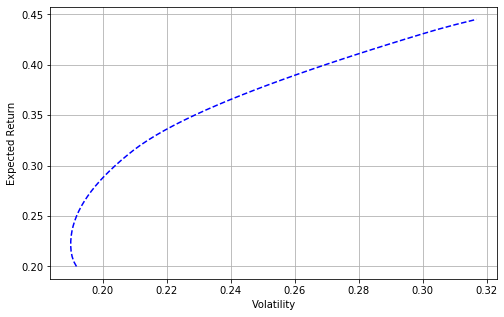

In [11]:
plt.figure(figsize=(8,5))
plt.plot(returns[:, 0], returns[:, 1], color = 'blue', label="Efficient Frontier", linestyle='--')
plt.xlabel("Volatility")
plt.ylabel("Expected Return")
plt.grid(True)
plt.legend()
plt.show()

In [14]:
numAssets = 6
    
def objective4(weights, covariance):
    return np.sqrt(np.dot(weights[:-1].T, np.dot(covariance, weights[:-1])))

def getTargetReturn2(weights, returns, targetReturn, risk_free): 
    portfolio_return = np.sum(returns*weights[:-1]) + (weights[5]) * risk_free 
    return (portfolio_return - targetReturn)

rfAssetReturn = 0.10
returns2 = []
for eff in np.arange(0.10, 0.40, 0.01):
    constraints = ({'type': 'eq', 'fun': getTargetReturn2, 
                    "args":(annual_expected, eff, rfAssetReturn)},
                    {'type': 'eq', 'fun': sumWeights}) 
    bounds = tuple((0, 1) for asset in range(numAssets))
    opts = optimize.minimize(objective4, np.ones(numAssets) / float(numAssets), 
                             args=(annual_covariance),
                             bounds=bounds, constraints=constraints)
    #if eff >= 0.3: 
    #    print (opts.x)
    returns2.append((np.sqrt(np.dot(opts.x[:-1].T, np.dot(annual_covariance, opts.x[:-1]))), 
                     np.sum(annual_expected*opts.x[:-1])+opts.x[5]*rfAssetReturn))
returns2 = np.array(returns2)

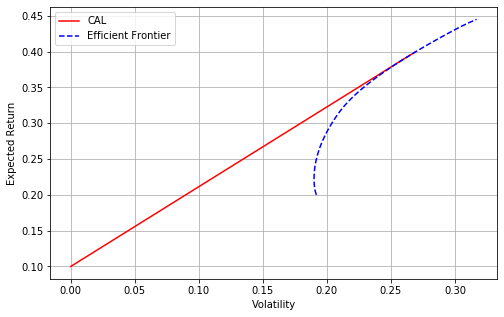

In [20]:
plt.figure(figsize=(8,5))
plt.plot(returns2[:,0], returns2[:,1], color = 'red', label="CAL")
plt.plot(returns[:, 0], returns[:, 1], color = 'blue', label="Efficient Frontier", linestyle='--')
plt.xlabel("Volatility")
plt.ylabel("Expected Return")
plt.grid(True)
plt.legend()
plt.show()